<a href="https://colab.research.google.com/github/KhanhPham2411/DeepLearning_BaNgoc/blob/master/L5/cats-dogs-classification/KapaForDogsCatsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nối Colab vô Drive 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

### Đi đến thư mục chứa data

In [0]:
cd /content/drive/My Drive/Colab Notebooks/Protonx/5/data

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O ./cats_and_dogs_filtered.zip

--2020-05-15 10:27:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘./cats_and_dogs_filtered.zip’

./cats_and_dogs_fil 100%[===================>]  65.43M   119MB/s    in 0.5s    

2020-05-15 10:27:09 (119 MB/s) - ‘./cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
main_folder = './'
!unzip -q cats_and_dogs_filtered.zip -d $main_folder

In [0]:
ls

cats_and_dogs_filtered/  cats_and_dogs_filtered.zip  sample_data/


In [3]:
cd cats_and_dogs_filtered

/content/cats_and_dogs_filtered


In [0]:
train_folder = './train'

In [0]:
valid_folder = './validation'

### [TODO 1] Xây dựng mô hình Deep Learning

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import RMSprop

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pickle
import os

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(16, (3 , 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3 , 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3 , 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [0]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['acc'])

### [TODO 2] Thực hiện training

In [0]:
import tensorflow as tf

DESIRED_ACCURACY = 0.7

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>DESIRED_ACCURACY):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [0]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

In [14]:
generated_train_data = train_generator.flow_from_directory(
    train_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


In [15]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder,
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    generated_train_data,
    steps_per_epoch = 8,
    epochs = 30,
    verbose = 1,
    validation_data = generated_valid_data,
    validation_steps = 8,
    callbacks=[callbacks],
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
8/8 [==============================] - 7s 847ms/step - loss: 1.4836 - acc: 0.5264 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 2/30
8/8 [==============================] - 7s 848ms/step - loss: 0.6867 - acc: 0.5369 - val_loss: 0.7055 - val_acc: 0.4970
Epoch 3/30
8/8 [==============================] - 7s 822ms/step - loss: 0.7329 - acc: 0.5244 - val_loss: 0.7027 - val_acc: 0.4750
Epoch 4/30
8/8 [==============================] - 6s 806ms/step - loss: 0.6775 - acc: 0.5676 - val_loss: 0.6710 - val_acc: 0.5510
Epoch 5/30
8/8 [==============================] - 7s 845ms/step - loss: 0.7520 - acc: 0.5410 - val_loss: 0.6837 - val_acc: 0.6010
Epoch 6/30
8/8 [==============================] - 6s 798ms/step - loss: 0.6831 - acc: 0.5809 - val_loss: 0.6753 - val_acc: 0.6160
Epoch 7/30
8/8 [==============================] - 7s 832ms/step - loss: 0.6567 - acc: 0.5898 - val_loss: 0.6519 - val_acc: 0.6430
Epoch 8/30
8/8

### [TODO 3] Thực hiện load file và dự đoán

Saving Image 13.png to Image 13 (2).png


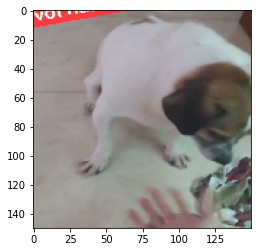

Image 13.png is a dog


In [20]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
    path = './' + fn
    img = image.load_img(path, target_size = (150, 150))
    imgplot = plt.imshow(img)
    plt.show()
    x = image.img_to_array(img) / 255

    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    if(classes[0] > 0.5):
        print(fn + " is a dog")
    else:
        print(fn + " is a cat")


### Hiển thị độ chính xác của mô hình

Text(0.5, 1.0, 'Training and validation loss')

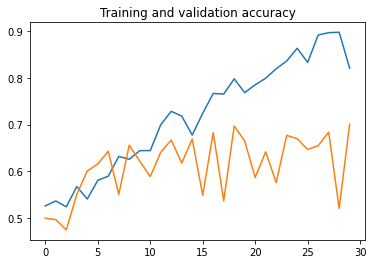

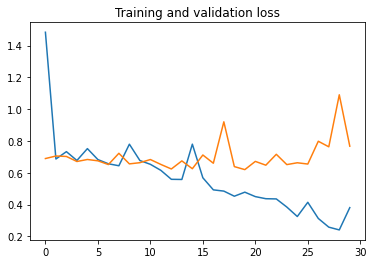

In [21]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )